In [109]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("../data/train_transformed.csv")
df_test = pd.read_csv("../data/test_transformed.csv")

In [3]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,24382,24383,24384,24385,24386,24387,24388,24389,24390,24391
job_type_blue-collar,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_entrepreneur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_housemaid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_management,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
job_type_retired,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_self-employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_services,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
job_type_student,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_technician,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
job_type_unemployed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,6088,6089,6090,6091,6092,6093,6094,6095,6096,6097
job_type_blue-collar,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
job_type_entrepreneur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_housemaid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_management,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_retired,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_self-employed,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_services,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
job_type_student,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_type_technician,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
job_type_unemployed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#filtering out columns not required for traditional modeling from df_train and df_test
df_train = df_train.loc[:,'job_type_blue-collar':'day_of_month_cos']
df_test = df_test.loc[:,'job_type_blue-collar':'day_of_month_cos']

In [6]:
#separating the x and y columns in train and test data 
df_train_x = df_train[[x for x in df_train.columns if x != 'term_deposit_subscribed']]
df_train_y = df_train[['term_deposit_subscribed']]
#reshaping the y variable to make it suitable for modeling
df_train_y = np.array(df_train_y).reshape(-1)

df_test_x = df_test[[x for x in df_test.columns if x != 'term_deposit_subscribed']]
df_test_y = df_test[['term_deposit_subscribed']]
#reshaping the y variable to make it suitable for modeling
df_test_y = np.array(df_test_y).reshape(-1)

### Logisitic Regression

In [8]:
parameters = [{'penalty' : ['l2'], 'C' : np.logspace(-2, 2, 30)}]
lr_gridcv = GridSearchCV(LogisticRegression(max_iter = 800), param_grid = parameters, cv = 5, n_jobs=-1, verbose = True, scoring = 'neg_log_loss')
lr_tuned = lr_gridcv.fit(df_train_x,df_train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/vishu_agarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#pd.DataFrame(lr_tuned.cv_results_).sort_values('rank_test_score')

In [9]:
#fitting the logistic regression model using the best set of parameters obtained above 
lr_tuned = LogisticRegression(**lr_tuned.best_params_ ).fit(df_train_x,df_train_y)

/Users/vishu_agarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
y_pred = lr_tuned.predict(df_test_x)
y_true = df_test_y
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5452
           1       0.67      0.30      0.42       646

    accuracy                           0.91      6098
   macro avg       0.80      0.64      0.69      6098
weighted avg       0.90      0.91      0.90      6098



### RandomForest 

In [14]:
param_grid = [{'criterion' : ['gini', 'entropy'], 'max_features' : ['auto', 'sqrt', 'log2'], 'n_estimators' : [100]}]
rf_gridcv = GridSearchCV(RandomForestClassifier(n_jobs = -1), param_grid = param_grid, cv = 5, n_jobs=-1, verbose = True, scoring = 'neg_log_loss')
rf_gridcv.fit(df_train_x, np.array(df_train_y).reshape(-1))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100]}],
             scoring='neg_log_loss', verbose=True)

In [15]:
rf_tuned = RandomForestClassifier(**rf_gridcv.best_params_).fit(df_train_x,df_train_y)

In [16]:
y_pred = rf_tuned.predict(df_test_x)
y_true = df_test_y
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5452
           1       0.68      0.38      0.49       646

    accuracy                           0.92      6098
   macro avg       0.80      0.68      0.72      6098
weighted avg       0.90      0.92      0.90      6098



In [26]:
param_grid = [{'criterion' : ['gini', 'entropy'], 'max_features' : ['auto', 'sqrt', 'log2'], 'n_estimators' : [100]}]
rf_gridcv = GridSearchCV(RandomForestClassifier(n_jobs = -1), param_grid = param_grid, cv = 5, n_jobs=-1, verbose = True, scoring = 'recall')
rf_gridcv.fit(df_train_x, np.array(df_train_y).reshape(-1))
rf_tuned = RandomForestClassifier(**rf_gridcv.best_params_).fit(df_train_x,df_train_y)
y_pred = rf_tuned.predict(df_test_x)
y_true = df_test_y
print(classification_report(y_true, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5452
           1       0.68      0.40      0.51       646

    accuracy                           0.92      6098
   macro avg       0.81      0.69      0.73      6098
weighted avg       0.91      0.92      0.91      6098



In [27]:
confusion_matrix(y_true,y_pred)

array([[5332,  120],
       [ 386,  260]])

## Refitting Logistic Regression and Random Forest on downsampled and balanced dataset

In [29]:
df_train_ds = pd.read_csv("../data/train_transformed_ds.csv")
df_test = pd.read_csv("../data/test_transformed.csv")

In [30]:
#filtering out columns not required for traditional modeling from df_train and df_test
df_train_ds = df_train_ds.loc[:,'job_type_blue-collar':'day_of_month_cos']
df_test = df_test.loc[:,'job_type_blue-collar':'day_of_month_cos']

In [31]:
#separating the x and y columns in train and test data 
df_train_ds_x = df_train_ds[[x for x in df_train_ds.columns if x != 'term_deposit_subscribed']]
df_train_ds_y = df_train_ds[['term_deposit_subscribed']]
#reshaping the y variable to make it suitable for modeling
df_train_ds_y = np.array(df_train_ds_y).reshape(-1)

df_test_x = df_test[[x for x in df_test.columns if x != 'term_deposit_subscribed']]
df_test_y = df_test[['term_deposit_subscribed']]
#reshaping the y variable to make it suitable for modeling
df_test_y = np.array(df_test_y).reshape(-1)

### Logistic Regression

In [39]:
parameters = [{'penalty' : ['l2'], 'C' : np.logspace(-2, 2, 30)}]
lr_gridcv = GridSearchCV(LogisticRegression(max_iter = 800), param_grid = parameters, cv = 5, n_jobs=-1, verbose = True, scoring = 'neg_log_loss')
lr_tuned = lr_gridcv.fit(df_train_ds_x,df_train_ds_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/vishu_agarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#fitting the logistic regression model using the best set of parameters obtained above 
lr_tuned = LogisticRegression(**lr_tuned.best_params_ ).fit(df_train_ds_x,df_train_ds_y)

/Users/vishu_agarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
y_pred = lr_tuned.predict(df_test_x)
y_true = df_test_y
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5452
           1       0.35      0.84      0.49       646

    accuracy                           0.82      6098
   macro avg       0.66      0.83      0.69      6098
weighted avg       0.91      0.82      0.85      6098



### Random Forest

In [104]:
param_grid = [{'criterion' : ['gini', 'entropy'], 'max_features' : ['auto', 'sqrt', 'log2'], 'n_estimators' : [100,200,300]}]
rf_gridcv = GridSearchCV(RandomForestClassifier(n_jobs = -1), param_grid = param_grid, cv = 5, n_jobs=-1, verbose = True, scoring = 'recall')
rf_gridcv.fit(df_train_ds_x, np.array(df_train_ds_y).reshape(-1))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200, 300]}],
             scoring='recall', verbose=True)

In [105]:
rf_tuned = RandomForestClassifier(**rf_gridcv.best_params_).fit(df_train_ds_x,df_train_ds_y)

In [106]:
y_pred = rf_tuned.predict(df_test_x)
y_true = df_test_y
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      5452
           1       0.43      0.95      0.59       646

    accuracy                           0.86      6098
   macro avg       0.71      0.90      0.75      6098
weighted avg       0.93      0.86      0.88      6098



In [107]:
#calculating the AUC
y_pred_prob = rf_tuned.predict_proba(df_test_x)
auc = roc_auc_score(y_true,y_pred_prob[:,1])
auc

0.9460352266558243

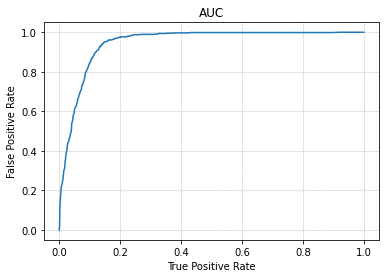

In [118]:
#plotting the AUC curve 
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('AUC')
plt.grid(linestyle = '--', linewidth = 0.5)

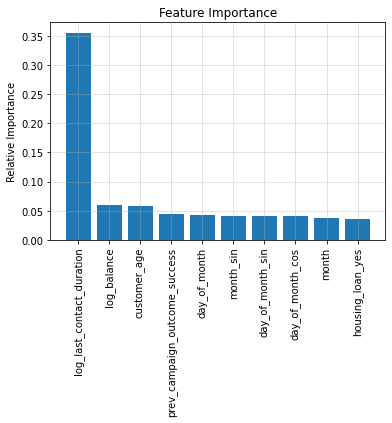

In [149]:
rf_feature_imp = pd.DataFrame(df_train_ds_x.columns,rf_tuned.feature_importances_).reset_index()
rf_feature_imp.columns = ['score','feature']
rf_feature_imp.sort_values('score', ascending = False, inplace = True)
plt.bar(rf_feature_imp['feature'][:10],rf_feature_imp['score'][:10])
plt.xticks(rotation = 90)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

In [121]:
df_train_ds.columns

Index(['job_type_blue-collar', 'job_type_entrepreneur', 'job_type_housemaid',
       'job_type_management', 'job_type_retired', 'job_type_self-employed',
       'job_type_services', 'job_type_student', 'job_type_technician',
       'job_type_unemployed', 'job_type_unknown', 'marital_married',
       'marital_single', 'marital_unknown', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes',
       'housing_loan_yes', 'personal_loan_yes', 'communication_type_telephone',
       'communication_type_unknown', 'prev_campaign_outcome_other',
       'prev_campaign_outcome_success', 'prev_campaign_outcome_unknown',
       'prev_campaign_contact_yes', 'balance_ind_positive', 'customer_age',
       'log_balance', 'log_last_contact_duration',
       'log_num_contacts_in_campaign', 'log_num_contacts_prev_campaign',
       'term_deposit_subscribed', 'month', 'month_sin', 'month_cos',
       'day_of_month', 'day_of_month_sin', 'day_of_month_cos'],
      dtype='object'

### xGBoost

In [ ]:
#installing xgboost
#conda install -c conda-forge xgboost

In [150]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [151]:
xgb_mdoel = XGBClassifier().fit(df_train_ds_x,df_train_ds_y)

In [152]:
y_pred = xgb_mdoel.predict(df_test_x)
y_true = df_test_y
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      5452
           1       0.45      0.93      0.60       646

    accuracy                           0.87      6098
   macro avg       0.72      0.90      0.76      6098
weighted avg       0.93      0.87      0.89      6098



In [155]:
param_grid = [{'eta' : [0.1,0.2,0.5], 'max_Depth' : [2,3,4,5], 'sampling method' : ['uniform'],'subsample' : [0.5,0.75], 'lambda':[0,0.5], 'num_parallel_tree' : [10]}]
xgb_gridcv = GridSearchCV(XGBClassifier(), param_grid = param_grid, cv = 5, n_jobs=-1, verbose = True, scoring = 'recall')
xgb_gridcv.fit(df_train_ds_x, np.array(df_train_ds_y).reshape(-1))
xgb_tuned = XGBClassifier(**xgb_gridcv.best_params_).fit(df_train_ds_x,df_train_ds_y)
y_pred = xgb_tuned.predict(df_test_x)
y_true = df_test_y
print(classification_report(y_true, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[10:52:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { max_Depth, sampling method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:52:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { max_Depth, sampling method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


              precision    recall  f1-score   support

           0       0.99      0.86      0.92      5452
           1       

In [156]:
#calculating the AUC
y_pred_prob = xgb_tuned.predict_proba(df_test_x)
auc = roc_auc_score(y_true,y_pred_prob[:,1])
auc

0.9494007936417799

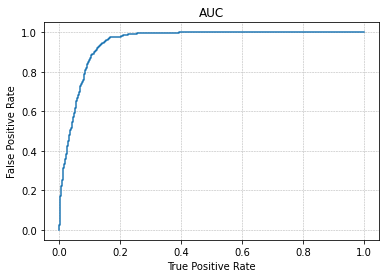

In [157]:
#plotting the AUC curve 
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('AUC')
plt.grid(linestyle = '--', linewidth = 0.5)

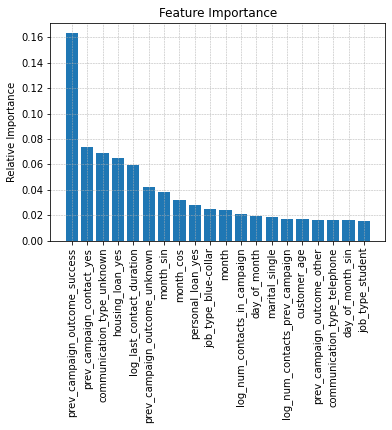

In [162]:
rf_feature_imp = pd.DataFrame(df_train_ds_x.columns,xgb_tuned.feature_importances_).reset_index()
rf_feature_imp.columns = ['score','feature']
rf_feature_imp.sort_values('score', ascending = False, inplace = True)
plt.bar(rf_feature_imp['feature'][:20],rf_feature_imp['score'][:20])
plt.xticks(rotation = 90)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

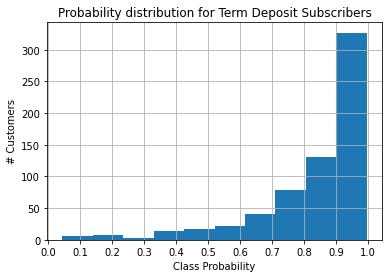

In [192]:
xgb_scores_pclass = pd.DataFrame(xgb_tuned.predict_proba(df_test_x[df_test_y == 1]))
xgb_scores_pclass[1].hist()
plt.xticks([x/10 for x in range(0,11)])
plt.xlabel('Class Probability')
plt.ylabel('# Customers')
plt.title('Probability distribution for Term Deposit Subscribers')
plt.show()

In [194]:
#total number of positive class in test data 
sum(df_test_y == 1)

646

In [197]:
#number of positive class in test data that we are able to predict accurately 
sum(xgb_tuned.predict(df_test_x[df_test_y == 1]))

605